In [2]:
# import bank-full.csv as bankdata
# info(),columns on data
# describe() of age, balance, duration
# Frequency counts of "y" with pie diagram & data labels
# Frequency counts of eduation with pie diagram & data label
# Frequency counts of job with bar chart and data labels
# Frequency Counts of "marital" & bar chart with datalabel
# Cross Tabulation of default & loan with Stacked Bar Chart & data labels
# Cross Tabulation of housing and marital with Stacked Bar Chart and data 
# labels
# Histogram, Boxplot and Density Curve on balance and duration

# groupby()
# Average balance of y
# Average balance of marital
# Average duration of job
# Median balance of education

# Hypothesis Testing
# Test Null Average balance of y is equal
# Test Null Average balance of housing is equal
# Test Null Average balance of marital is equal
# Test Null Average duration of education is equal
# Test Null No Association between y and default
# Test Null No Association between loan and housing
# Test Null No Association between marital and y
# Test Null No Association between education and job


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import io
%cd "C:\Users\chkee\Downloads\Imarticus Learning\Python"

C:\Users\chkee\Downloads\Imarticus Learning\Python


In [5]:
bank=pd.read_csv("bank-full.csv")

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# describe() of age, balance, duration
bank[['age', 'balance', 'duration']].describe()

,age,balance,duration
count,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080
std,10.618762,3044.765829,257.527812
min,18.000000,-8019.000000,0.000000
25%,33.000000,72.000000,103.000000
50%,39.000000,448.000000,180.000000
75%,48.000000,1428.000000,319.000000
max,95.000000,102127.000000,4918.000000


In [8]:
# Frequency counts of "y" with pie diagram & data labels
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<Axes: ylabel='y'>

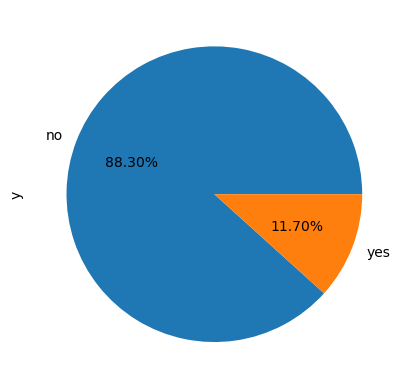

In [9]:
#pie chart
bank.y.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='education'>

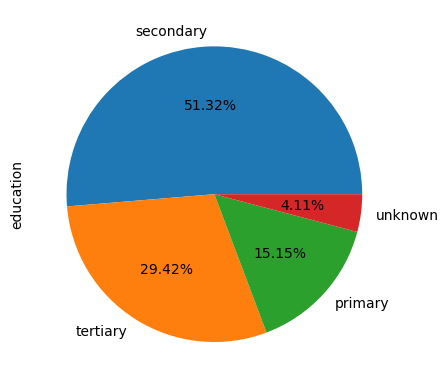

In [10]:
#Frequency counts of eduation with pie diagram & data label
bank.education.value_counts().plot(kind='pie',autopct='%.2f%%')

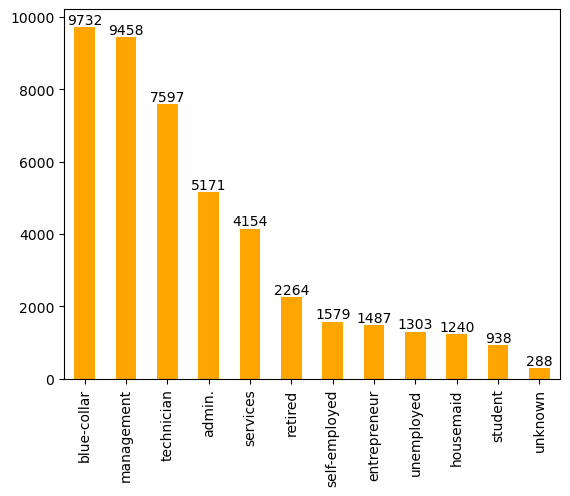

In [11]:
#Frequency counts of job with bar chart and data labels
ax=bank.job.value_counts().plot(kind='bar',color='Orange')
for i in ax.containers:
    ax.bar_label(i)

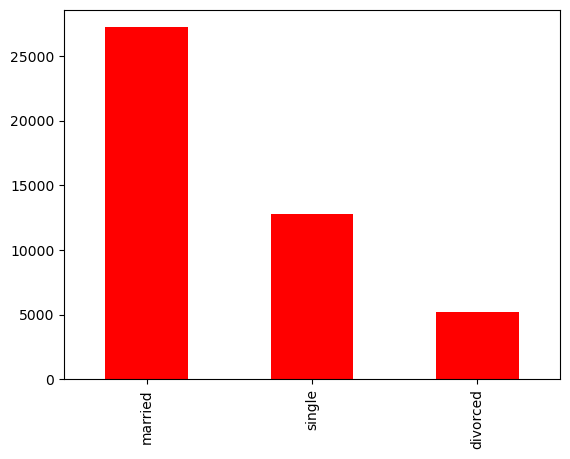

In [12]:
#Frequency Counts of "marital" & bar chart with datalabel
bank.marital.value_counts().plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i)

In [13]:
#Cross Tabulation of default & loan with Stacked Bar Chart & data labels
pd.crosstab(bank.default,bank.loan)

loan,no,yes
default,,
no,37453,6943
yes,514,301


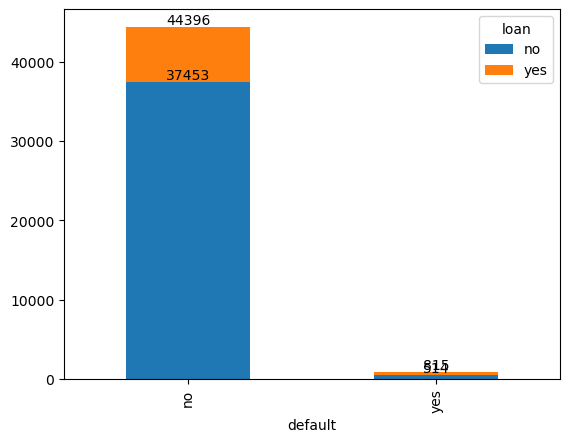

In [14]:
#stacked bar chart
ax=pd.crosstab(bank.default,bank.loan).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [15]:
#Cross Tabulation of housing and marital with Stacked Bar Chart and data 
pd.crosstab(bank.housing,bank.loan)

loan,no,yes
housing,,
no,17204,2877
yes,20763,4367


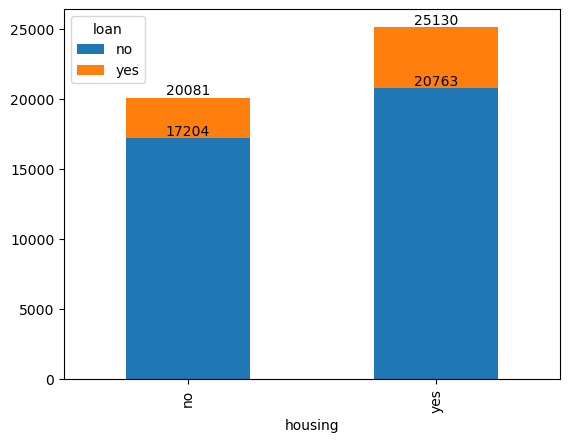

In [16]:
ax=pd.crosstab(bank.housing,bank.loan).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [17]:
#Histogram, Boxplot and Density Curve on balance and duration
import seaborn as sns

In [18]:
print(bank.balance.skew())
print(bank.balance.kurt())

8.360308326166326
140.75154662504158


<Figure size 1000x500 with 0 Axes>

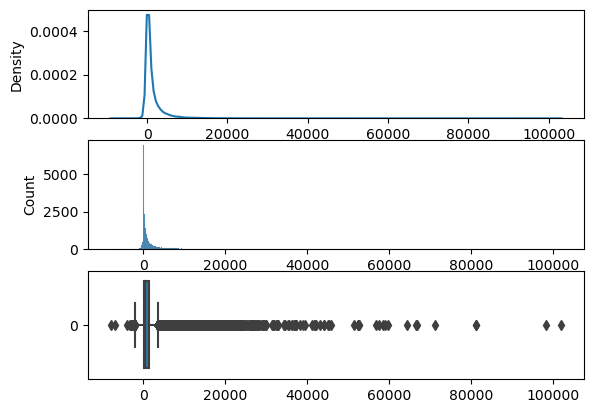

In [19]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(bank.balance,ax=ax[0])
sns.histplot(bank.balance,ax=ax[1])
sns.boxplot(bank.balance,ax=ax[2],orient='h')
plt.show()

In [20]:
print(bank.duration.skew())
print(bank.duration.kurt())

3.144318099423456
18.153915269019706


<Figure size 1000x500 with 0 Axes>

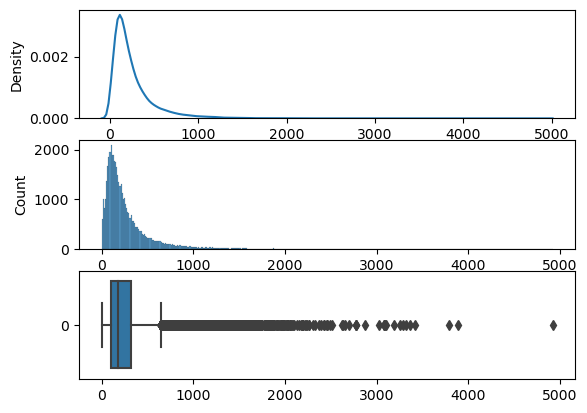

In [21]:
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(3,1)
sns.kdeplot(bank.duration,ax=ax[0])
sns.histplot(bank.duration,ax=ax[1])
sns.boxplot(bank.duration,ax=ax[2],orient='h')
plt.show()

In [22]:
# Average balance by y (no/yes)
bank.balance.groupby(bank.y).mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [23]:
# Average balance by marital
bank.balance.groupby(bank.marital).mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

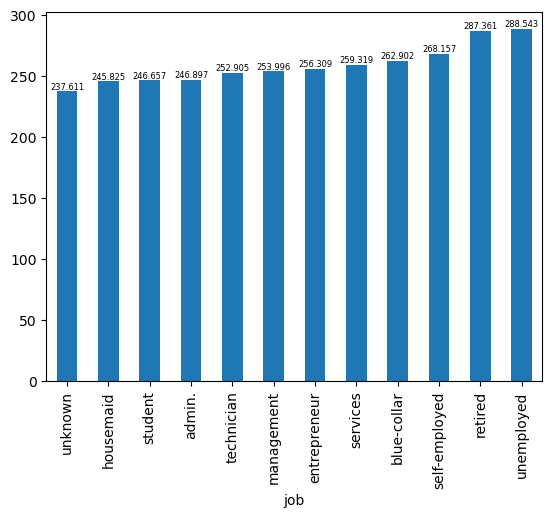

In [24]:
# Average duration by job
ax=bank.duration.groupby(bank.job).mean().sort_values(ascending=True).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

In [25]:
# Median balance of education
bank.balance.groupby(bank.education).median()

education
primary      403.0
secondary    392.0
tertiary     577.0
unknown      568.0
Name: balance, dtype: float64

In [26]:
# IS there relationship between age and balance, age and duration,
# balance and duration.
bank[['balance','age','duration']].cov()


,balance,age,duration
balance,9.270599e+06,3161.476700,16905.750545
age,3.161477e+03,112.758107,-12.711716
duration,1.690575e+04,-12.711716,66320.574090


In [27]:
bank[['balance','age','duration']].corr()

,balance,age,duration
balance,1.000000,0.097783,0.021560
age,0.097783,1.000000,-0.004648
duration,0.021560,-0.004648,1.000000


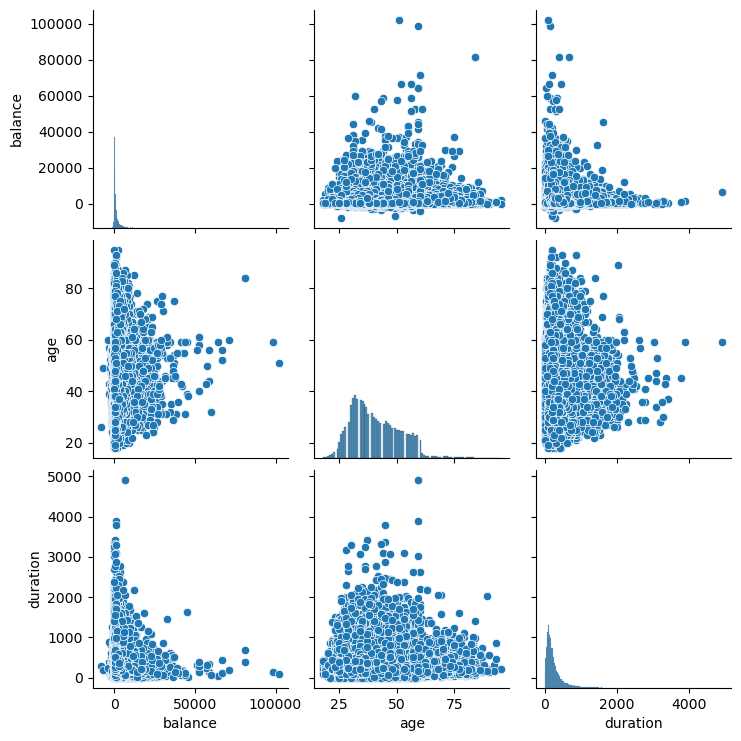

In [28]:
sns.pairplot(bank[['balance','age','duration']])

<Axes: >

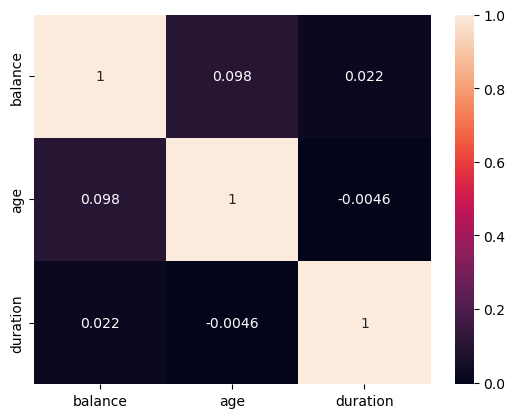

In [29]:
sns.heatmap(bank[['balance','age','duration']].corr(),annot=True)

In [30]:
#Test Null Average balance of y is equal
# balance - numeric & y-Categorical(with exactly 2 levels)
# Hypothesis Test - 2 Sample Independent T test
bank.balance.groupby(bank.y).mean() # Difference in Means/Averages
 

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [31]:
bank.balance.groupby(bank.y).var()

y
no     8.845839e+06
yes    1.225773e+07
Name: balance, dtype: float64

In [32]:
# Splitdata
deposityes=bank[bank.y=='yes']
depositno=bank[bank.y=='no']

In [33]:
# Frame Null & Alt Hypothesis
# Null - No Significant difference in Average balance of y(deposit) yes/no
# Alt - Significant difference in Average balance of y(deposit) yes/no

In [34]:
from scipy.stats import ttest_ind

In [35]:
ttest_ind(deposityes.balance,depositno.balance,equal_var=False)

Ttest_indResult(statistic=9.933545392962255, pvalue=4.3837327771001536e-23)

In [36]:
#Test Null Average balance of housing is equal
bank.balance.groupby(bank.housing).mean()
#means are different

housing
no     1596.501270
yes    1175.103064
Name: balance, dtype: float64

In [37]:
bank.balance.groupby(bank.housing).var()

housing
no     1.305670e+07
yes    6.166708e+06
Name: balance, dtype: float64

In [38]:
housingno=bank[bank.housing=='no']
housingyes=bank[bank.housing=='yes']

In [39]:
ttest_ind(housingno.balance,housingyes.balance,equal_var=False)
#p<0.05  reject null there is a significant difference in avg balance of housing yes/no

Ttest_indResult(statistic=14.081117553694206, pvalue=6.625425926072512e-45)

In [40]:
# Test Null Average balance of marital is equal
bank.balance.groupby(bank.marital).mean()
#diff in mean

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

In [41]:
# Null - No Significant difference in Average balance of different marital
# Alt - Significant difference in Average balance of different marital

In [42]:
#split data
divorced=bank[bank.marital=='divorced']
married=bank[bank.marital=='married']
single=bank[bank.marital=='single']

In [43]:
from scipy.stats import f_oneway

In [44]:
f_oneway(divorced.balance,married.balance,single.balance)
#p<0.05 reject null there is signigficant association b/w balance and marital status

F_onewayResult(statistic=17.954318144453257, pvalue=1.6055869132631893e-08)

In [45]:
 #Test Null Average duration of education is equal
bank.duration.groupby(bank.education).mean()

education
primary      255.933002
secondary    258.685760
tertiary     258.518532
unknown      257.313947
Name: duration, dtype: float64

In [46]:
#split data
primary=bank[bank.education=='primary']
secondary=bank[bank.education=='secondary']
tertiary=bank[bank.education=='tertiary']
unknown=bank[bank.education=='unknown']

In [47]:
f_oneway(primary.duration,secondary.duration,tertiary.duration,unknown.duration)
# p>0.05 fail to reject there is no association b/w duration and education


F_onewayResult(statistic=0.21827106097891696, pvalue=0.8837766874485439)

In [48]:
# Test Null No Association between y and default

# Both Variables are Non Numeric and Categorical - Chi Square Test of 
# Independence
# Input is cross tabulation - frequency table of 2 non numeric categrocial
# variables

In [49]:
# Null - No Association between both variables
# Alt - Association between both variables

In [50]:
from scipy.stats import chi2_contingency

In [51]:
pd.crosstab(bank.y,bank.default)

default,no,yes
y,,
no,39159,763
yes,5237,52


In [52]:
chi2_contingency(pd.crosstab(bank.y,bank.default))
#p>0.05 fail to reject null there is no association b/w default and depsit

Chi2ContingencyResult(statistic=22.20224995571685, pvalue=2.4538606753508344e-06, dof=1, expected_freq=array([[39202.34261574,   719.65738426],
       [ 5193.65738426,    95.34261574]]))

In [53]:
# Test Null No Association between loan and housing
#Both Variables are Non Numeric and Categorical - Chi Square Test of Independence
pd.crosstab(bank.loan,bank.housing)

housing,no,yes
loan,,
no,17204,20763
yes,2877,4367


In [54]:
chi2_contingency(pd.crosstab(bank.loan,bank.housing))
#p<0.05 reject null there is a significant association between loan and housing

Chi2ContingencyResult(statistic=76.97480834381858, pvalue=1.7315256945310098e-18, dof=1, expected_freq=array([[16863.49178297, 21103.50821703],
       [ 3217.50821703,  4026.49178297]]))

In [55]:
# Test Null No Association between marital and y
#Both Variables are Non Numeric and Categorical - Chi Square Test of Independence
pd.crosstab(bank.y,bank.marital)

marital,divorced,married,single
y,,,
no,4585,24459,10878
yes,622,2755,1912


In [56]:
chi2_contingency(pd.crosstab(bank.y,bank.marital))
#p<0.05 reject null there is a significant association between y and marital

Chi2ContingencyResult(statistic=196.4959456560396, pvalue=2.1450999986791486e-43, dof=2, expected_freq=array([[ 4597.86012254, 24030.37552808, 11293.76434938],
       [  609.13987746,  3183.62447192,  1496.23565062]]))

In [57]:
# Test Null No Association between education  and job
chi2_contingency(pd.crosstab(bank.education,bank.job))
#p<0.05 reject null

Chi2ContingencyResult(statistic=28483.1364531764, pvalue=0.0, dof=33, expected_freq=array([[ 783.58189379, 1474.72809714,  225.33093716,  187.90205923,
        1433.20780341,  343.07279202,  239.27205769,  629.47189843,
         142.13881577, 1151.20318064,  197.44869611,   43.6417686 ],
       [2653.7245803 , 4994.4010086 ,  763.11901971,  636.36017783,
        4853.78593705, 1161.87051824,  810.33283935, 2131.80659574,
         481.37568291, 3898.73247661,  668.69138042,  147.79978324],
       [1521.29948464, 2863.13799739,  437.47289376,  364.80591007,
        2782.5276592 ,  666.06498419,  464.53913871, 1222.09979872,
         275.95801907, 2235.02459578,  383.34040388,   84.7291146 ],
       [ 212.39404127,  399.73289686,   61.07714937,   50.93185287,
         388.47860034,   92.99170556,   64.85596426,  170.62170711,
          38.52748225,  312.03974696,   53.51951959,   11.82933357]]))